In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [15]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [16]:
plt.rcParams["font.family"] = "Arial"

In [17]:
np.random.seed(0)
X = np.random.rand(60, 1)
y = np.where(X > 0.5, 1, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_log_likelihood(theta0, theta1):
    h = sigmoid(theta0 + theta1 * X)
    log_likelihood = np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return log_likelihood

In [19]:
theta0_vals = np.linspace(-6, 2, 100)
theta1_vals = np.linspace(2, 6, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
loglik_grid = np.zeros_like(theta0_grid)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        loglik_grid[i, j] = compute_log_likelihood(
            theta0_vals[i], theta1_vals[j])

theta0_slider = widgets.FloatSlider(
    value=1, min=-6, max=2, step=0.1, description='Theta0:')
theta1_slider = widgets.FloatSlider(
    value=1, min=2, max=6, step=0.1, description='Theta1:')

figure_container = widgets.Output(layout={'border': '1px solid black'})


def update_figure(change):
    with figure_container:
        clear_output(wait=True)

        plt.subplot(1, 2, 1)
        plt.contourf(theta0_grid, theta1_grid, loglik_grid,
                     levels=20, cmap='viridis')
        plt.colorbar(label='Log Likelihood')

        true_theta0 = -2.0
        true_theta1 = 4.0
        plt.scatter([true_theta0], [true_theta1], color='blue',
                    marker='o', label='True Values')
        plt.scatter([theta0_slider.value], [theta1_slider.value],
                    color='red', marker='x', label='Current Values')

        plt.xlabel('Theta0')
        plt.ylabel('Theta1')
        plt.title('Log Likelihood Contour Plot')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.scatter(X, y, c=y, cmap=ListedColormap(
            ['#FF0000', '#0000FF']), edgecolors='k', marker='o')

        if theta1_slider.value != 0:
            plt.plot([0, 1], [-theta0_slider.value/theta1_slider.value, (1-theta0_slider.value) /
                     theta1_slider.value], color='red', label='Decision Boundary')
        else:
            plt.axvline(x=theta0_slider.value, color='red',
                        linestyle='--', label='Decision Boundary')

        plt.xlabel('X')
        plt.ylabel('Class')
        plt.title('Logistic Regression Decision Boundary')
        plt.legend()

        # plt.tight_layout()
        plt.show()


theta0_slider.observe(update_figure, 'value')
theta1_slider.observe(update_figure, 'value')

update_figure(None)

display(widgets.HBox(
    [figure_container, widgets.VBox([theta0_slider, theta1_slider])]))

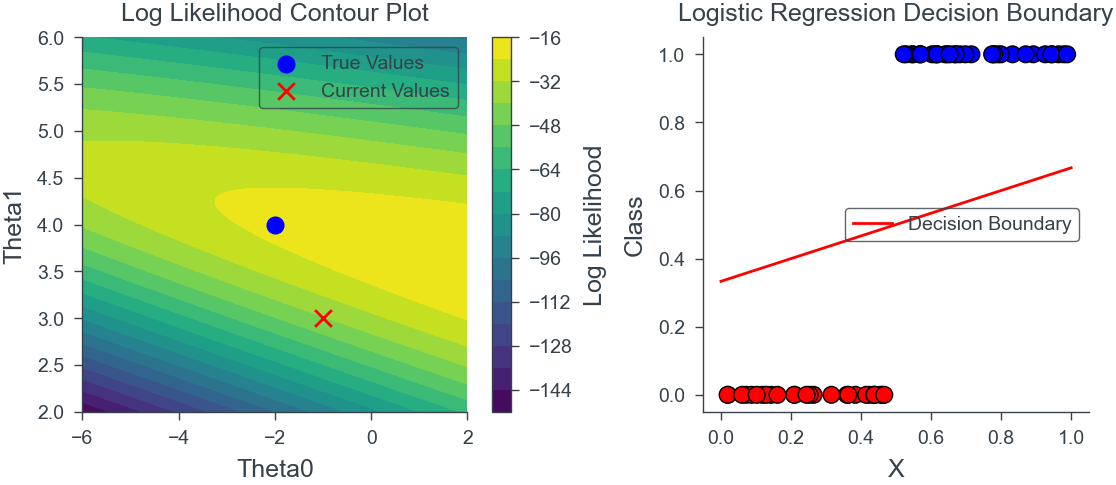

In [27]:
plt.subplot(1, 2, 1)
plt.contourf(theta0_grid, theta1_grid, loglik_grid, levels=20, cmap='viridis')
plt.colorbar(label='Log Likelihood')

true_theta0 = -2.0
true_theta1 = 4.0
plt.scatter([true_theta0], [true_theta1], color='blue',
            marker='o', label='True Values')
plt.scatter([-1], [3], color='red', marker='x', label='Current Values')

plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Log Likelihood Contour Plot')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y, c=y, cmap=ListedColormap(
    ['#FF0000', '#0000FF']), edgecolors='k', marker='o')

if theta1_slider.value != 0:
    plt.plot([0, 1], [1/3, (1+1)/3], color='red', label='Decision Boundary')
else:
    plt.axvline(x=-1, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Class')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

# plt.tight_layout()
plt.savefig('figures/mle/log_reg_slider_3.pdf')